## import model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

## read files

In [2]:
# GiveMeSonmeCredit dataset: https://www.kaggle.com/c/GiveMeSomeCredit

# SeriousDlqin2yrs：Person experienced 90 days past due delinquency or worse 
# RevolvingUtilizationOfUnsecuredLines：Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
# age：Age of borrower in years
# NumberOfTime30-59DaysPastDueNotWorse：Number of times borrower has been 30-59 days past due but no worse in the last 2 years
# DebtRatio：Monthly debt payments, alimony,living costs divided by monthy gross income
# MonthlyIncome：Monthly income
# NumberOfOpenCreditLinesAndLoans：Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
# NumberOfTimes90DaysLate：Number of times borrower has been 90 days or more past due.
# NumberRealEstateLoansOrLines：Number of mortgage and real estate loans including home equity lines of credit
# NumberOfTime60-89DaysPastDueNotWorse：Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
# NumberOfDependents：Number of dependents in family excluding themselves (spouse, children etc.)

file_path = 'cs-training.csv'
df = pd.read_csv(file_path)

## base information

In [3]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [7]:
#填补缺失值
print(df.isnull().sum())

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [8]:
#填补缺失值
df = df.fillna(-999)
print(df.isnull().sum())

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


## binning

In [ ]:
# 分箱会影响IV和WOE的计算
# 分箱的方式多种，最常用的为等距和等频分箱

#cut分箱（等距）
# age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
# df['bin_age'] = pd.cut(df['age'],bins=age_bins).astype(str)
# dependent_bin = [-math.inf,2,4,6,8,10,math.inf]
# df['bin_NumberOfDependents'] = pd.cut(df['NumberOfDependents'],bins=dependent_bin).astype(str)
# dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
# df['bin_NumberOfTimes90DaysLate'] = pd.cut(df['NumberOfTimes90DaysLate'],bins=dpd_bins)
# df['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
# df['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)

# # #qcut分箱（分位数）
# df['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop').astype(str)
# df['bin_DebtRatio'] = pd.qcut(df['DebtRatio'],q=5,duplicates='drop').astype(str)
# df['bin_MonthlyIncome'] = pd.qcut(df['MonthlyIncome'],q=5,duplicates='drop').astype(str)
# df['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop').astype(str)
# df['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df['NumberRealEstateLoansOrLines'],q=5,duplicates='drop').astype(str)

In [9]:
#决策树分箱
def decision_tree_binning(x: pd.Series, y: pd.Series)->list:
    
    x = x.values
    y = y.values
    clf = DecisionTreeClassifier(criterion='entropy',       #信息熵
                                    max_leaf_nodes=6,       #最大叶子节点数
                                    min_samples_leaf=0.05)  #叶子节点最小样本数量占比
    clf.fit(x.reshape(-1,1),y)

    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    threshold = clf.tree_.threshold

    boundary = []

    for i in range(n_nodes):
        if children_left[i] != children_right[i]:  # 获得决策树节点上的划分边界值
            boundary.append(threshold[i])

    boundary.sort()

    min_x = x.min()
    max_x = x.max() + 0.1  # 保留最大样本
    boundary = [min_x] + boundary + [max_x]

    return boundary

In [10]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [11]:
feature_cols = [
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
for f in feature_cols:
    bin_list = decision_tree_binning(df[f],df['SeriousDlqin2yrs'])
    bin_list = [-math.inf]+bin_list+[math.inf]
    df['bin_'+f] = pd.cut(df[f],bins=bin_list).astype(str)
#     print(f,bin_list)

## IV (Information Value) and WOE (Weight of Evidence)

In [12]:
def cal_IV(df, feature, targe):
    '''
        计算变量各个分箱的WOE、IV值，返回一个DataFrame
    '''
    feature_cols = []
    df_woe = df 
    for f in feature:
        grouped = df.groupby(f)[targe]                           # 统计各分箱区间的好、坏、总客户数量
        df_tmp = grouped.agg([('good',  lambda x: (x == 0).sum()), 
                                 ('bad',   lambda x: (x == 1).sum()),
                                 ('total', 'count')])
        df_tmp = df_tmp.reset_index()
        df_tmp['good_rate'] = df_tmp['good'] / df_tmp['good'].sum()       # good_rate
        df_tmp['bad_rate'] = df_tmp['bad'] / df_tmp['bad'].sum()          # bad_rate
        df_tmp['total_rate'] = df_tmp['total'] / df_tmp['total'].sum()    # total_rate

        df_tmp['woe_'+f] = np.log(df_tmp['good_rate'] / df_tmp['bad_rate'])              # WOE
        df_tmp['iv'] = (df_tmp['good_rate'] - df_tmp['bad_rate']) * df_tmp['woe_'+f]  # IV
        
            
#         print(df_tmp)
        print(f"{f}的IV为：{df_tmp['iv'].sum()} ")
        
        if df_tmp['iv'].sum() > 0.1: 
            feature_cols.append(f)
            df_woe = df_woe.merge(df_tmp,on=f,how='left')
    
    return df_woe.reset_index()

In [13]:
bin_cols = [c for c in df.columns.values if c.startswith('bin_')]
df_woe = cal_IV(df,bin_cols,'SeriousDlqin2yrs')

bin_RevolvingUtilizationOfUnsecuredLines的IV为：1.1210025631592666 
bin_age的IV为：inf 
bin_NumberOfTime30-59DaysPastDueNotWorse的IV为：0.7404812872794013 
bin_DebtRatio的IV为：0.07928208512747813 
bin_MonthlyIncome的IV为：0.09030842903136274 
bin_NumberOfOpenCreditLinesAndLoans的IV为：0.10561221308542024 
bin_NumberOfTimes90DaysLate的IV为：0.8375513427285136 
bin_NumberRealEstateLoansOrLines的IV为：0.05535386543277276 
bin_NumberOfTime60-89DaysPastDueNotWorse的IV为：0.5723728876090994 
bin_NumberOfDependents的IV为：0.035302901254262956 


In [14]:
#IV值进行特征筛选
#IV值小于0.02的，几乎没有预测效果（Useless for prediction）
#IV值0.02~0.1的，预测效果弱（Weak predictor）
#IV值0.1~0.3的，预测效果中等（Medium predictor）
#IV值0.3~0.5的，预测效果强（Strong predictor）
#IV值大于0.5的，难以置信，需确认（Suspicious or too good to be true）
feature_cols = ['RevolvingUtilizationOfUnsecuredLines',
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate']
df_bin_to_woe = pd.DataFrame(columns = ['features','bin','woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df_tmp = df_woe[[w,b]].drop_duplicates()
    df_tmp.columns = ['woe','bin']
    df_tmp['features'] = f
    df_tmp=df_tmp[['features','bin','woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe,df_tmp])
df_bin_to_woe.sort_values(by = ['features','bin'])

,features,bin,woe
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 0.0]",0.541721
2,NumberOfTime30-59DaysPastDueNotWorse,"(0.5, 1.5]",-0.903654
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.5, 98.1]",-1.901126
0,NumberOfTime60-89DaysPastDueNotWorse,"(-inf, 0.0]",0.288208
13,NumberOfTime60-89DaysPastDueNotWorse,"(0.5, 98.1]",-2.079448
0,NumberOfTimes90DaysLate,"(-inf, 0.0]",0.389724
2,NumberOfTimes90DaysLate,"(0.5, 98.1]",-2.298734
35,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0]",0.860043
11,RevolvingUtilizationOfUnsecuredLines,"(0.0, 0.115]",1.486148
5,RevolvingUtilizationOfUnsecuredLines,"(0.115, 0.218]",0.843761


# trainning

In [15]:
woe_cols = ['woe_bin_'+ c for c in feature_cols ]
X_train, X_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=996)
model = LogisticRegression(random_state=996).fit(X_train,y_train)

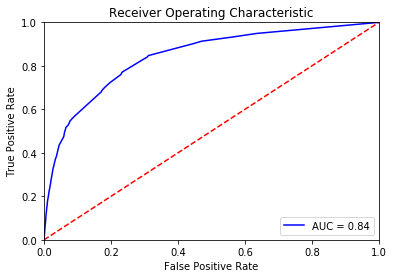

In [16]:
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# print(roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## score card

In [17]:
def generate_scorecard(model_coef,binning_df,features,B):
    lst = []
    cols = ['feature','bin','score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(-coef[i]*row['woe']*B))])
    data = pd.DataFrame(lst, columns=cols)
    return data

In [18]:
A = 650                #基准分
B = 72.13475204444818  #POD 50/ln2
score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)
score_card.sort_values(by = ['feature', 'bin'])

,feature,bin,score
8,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 0.0]",21
9,NumberOfTime30-59DaysPastDueNotWorse,"(0.5, 1.5]",-35
7,NumberOfTime30-59DaysPastDueNotWorse,"(1.5, 98.1]",-74
10,NumberOfTime60-89DaysPastDueNotWorse,"(-inf, 0.0]",8
11,NumberOfTime60-89DaysPastDueNotWorse,"(0.5, 98.1]",-61
12,NumberOfTimes90DaysLate,"(-inf, 0.0]",15
13,NumberOfTimes90DaysLate,"(0.5, 98.1]",-88
6,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0]",43
5,RevolvingUtilizationOfUnsecuredLines,"(0.0, 0.115]",75
4,RevolvingUtilizationOfUnsecuredLines,"(0.115, 0.218]",42


## sample

In [19]:
def map_value_to_bin(feature_value,feature_to_bin):
    for idx, row in feature_to_bin.iterrows():
        bins = str(row['bin'])
        binnings = bins[1:-1].split(',')
        if feature_value > float(binnings[0]) and feature_value <= float(binnings[1]):
            return row['bin']
    return None

def map_to_score(df,score_card):
    scored_columns = list(score_card['feature'].unique())       #feature_cols
    score = 0
    for col in scored_columns:
#         print(col)
        feature_to_bin = score_card[score_card['feature']==col]
        feature_value = df[col]
        selected_bin = map_value_to_bin(feature_value,feature_to_bin) #转df分桶为评分
#         print(selected_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['bin'] == selected_bin]
        score += selected_record_in_scorecard['score'].iloc[0]
#         print(score)
    return score  

def calculate_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] = df['score']+A
    df['score'] = df['score'].astype(int)
    return df

In [20]:
good_sample = df[df['SeriousDlqin2yrs']==0][feature_cols].sample(5, random_state=1)
calculate_score_with_card(good_sample,score_card,A)

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,score
149862,0.000000,0,0,0,737
43190,0.003769,0,0,0,769
90275,0.000000,0,0,0,737
6741,0.013976,0,0,0,769
140108,0.089350,0,0,0,769


In [21]:
bad_sample = df[df['SeriousDlqin2yrs']==1][feature_cols].sample(5, random_state=1)
calculate_score_with_card(bad_sample,score_card,A)

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,score
86741,1.000000,0,0,0,625
137326,0.612609,2,0,0,580
79696,0.608164,5,0,1,477
87970,0.964554,1,1,0,500
120547,0.940120,0,1,1,453
